In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/raw/HSTMachineError.csv')
test.head()

,MerId,MerType,MerDate,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority
0,11897185,7,2025-01-30 10:22:00.000,10,22,181.0,180.0,90.0,NaN,NaN,4620,NaN,0,0,0
1,11897186,21,2025-01-30 10:21:42.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
2,11897187,23,2025-01-30 10:21:56.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0
3,11897188,21,2025-01-30 10:21:56.000,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0
4,11897189,23,2025-01-30 10:21:57.000,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0


Aggregate data by day

In [15]:
# Convert MerDate to datetime if not already done
test['MerDate'] = pd.to_datetime(test['MerDate'])

# Extract the date part from MerDate
test['MerDateDay'] = test['MerDate'].dt.date

# Aggregate data by day and count the specified values of MerType
aggregated_data = test.groupby('MerDateDay').apply(
    lambda x: pd.Series({
        'Total errors': (x['MerType'] == 21).sum(),
        'Total warnings': (x['MerType'] == 23).sum(),
        'Total settings changed': (x['MerType'] == 15).sum(),
        'Total stops lane related': ((x['MerType'] == 8) & (x['MerNumber'] == 0) & (x['MerSubNumber'] == 2)).sum(), #we only want lane related errors MerSubNumber 2 is lane related
        'Total stops': ((x['MerType'] == 8) & (x['MerNumber'] == 0)).sum()
    })
).reset_index()

aggregated_data.head(5)

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_35249/251424520.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data = test.groupby('MerDateDay').apply(


,MerDateDay,Total errors,Total warnings,Total settings changed,Total stops lane related,Total stops
0,2025-01-30,2983,10999,862,413,493
1,2025-01-31,2618,12839,1366,247,312
2,2025-02-01,0,1,0,0,0
3,2025-02-02,38,39,0,0,0
4,2025-02-03,3462,7481,1264,356,473


Show distribution of total stops and errors for all days

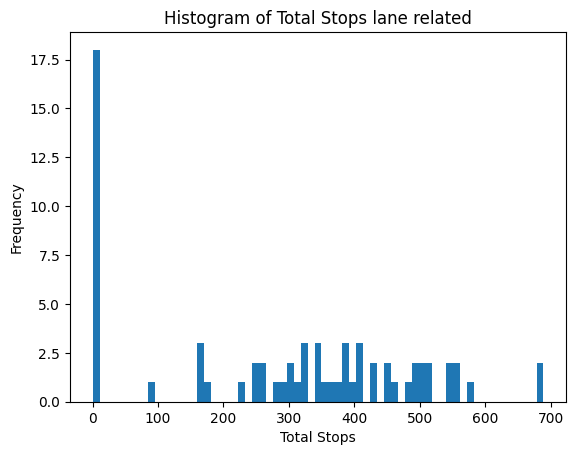

In [16]:
plt.hist(aggregated_data['Total stops lane related'], bins=65)
plt.title('Histogram of Total Stops lane related')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')
plt.show()

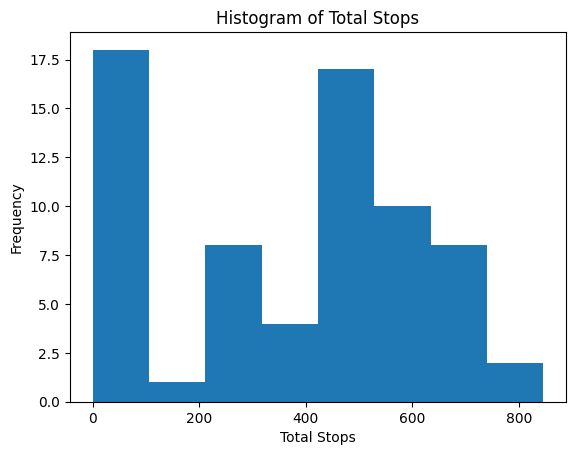

In [17]:
plt.hist(aggregated_data['Total stops'], bins=8)
plt.title('Histogram of Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Frequency')
plt.show()

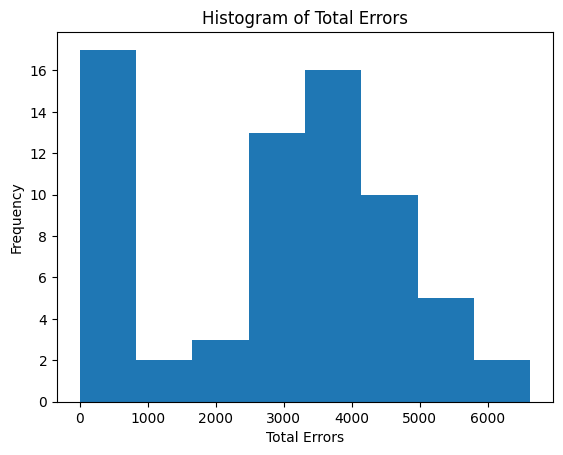

In [18]:
plt.hist(aggregated_data['Total errors'], bins=8)
plt.title('Histogram of Total Errors')
plt.xlabel('Total Errors')
plt.ylabel('Frequency')
plt.show()

Removing weekends to keep a dataset with only regular machine operation days

In [19]:
# Convert MerDateDay to datetime if not already done
test['MerDate'] = pd.to_datetime(test['MerDate'] )

# Filter out weekend dates (Saturday and Sunday)
test = test[~test['MerDate'].dt.weekday.isin([5, 6])]

In [20]:
# export cleaned data
df_cleaned = test
df_cleaned.to_csv('cleaned_data.csv', index=False)